<hr style="border:2px solid">
<h1 style="text-align:center; font-size: 3em;">Exploratory Data Analysis</h1>
<hr style="border-top:1px dashed">

<hr style="border:2px solid">

# 1. Importing Libraries
<hr style="border-top:1px dashed">

In [ ]:
#importing libraies for EDA
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<hr style="border:2px solid">

# 2. Importing data
<hr style="border-top:1px dashed">

In [ ]:
#importing and checking the cleaned data
crime= pd.read_csv('Data/cleaned_crime_data.csv')

crime.head()

,Reported by,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category,year,month
0,Dyfed-Powys Police,-4.257090,52.028798,On or near Bro'R Orsaf,Carmarthenshire 001A,Drugs,Local resolution,2023,1
1,Dyfed-Powys Police,-4.257090,52.028798,On or near Bro'R Orsaf,Carmarthenshire 001A,Public order,Investigation complete; no suspect identified,2023,1
2,Dyfed-Powys Police,-4.265691,51.992178,On or near Golwg Yr Ogof,Carmarthenshire 001A,Violence and sexual offences,Unable to prosecute suspect,2023,1
3,Dyfed-Powys Police,-4.114057,52.033260,On or near,Carmarthenshire 001C,Other theft,Unable to prosecute suspect,2023,1
4,Dyfed-Powys Police,-4.114057,52.033260,On or near,Carmarthenshire 001C,Public order,Unable to prosecute suspect,2023,1


<hr style="border:2px solid">

# 3. Exploratory Data Analysis
<hr style="border-top:1px dashed">

General  Insights

- Crimes over time and seasonality

- Distribution of crimes per police force

- Crime distribution by type


In [ ]:
#Creating new column for season
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

#creating a new string column for month
def month_string(month):
    if month == 1:
        return 'Jan'
    elif month ==2:
        return 'Feb'
    elif month == 3:
        return 'Mar'
    elif month == 4:
        return 'Apr'
    elif month ==5:
        return 'May'
    elif month ==6:
        return 'Jun'
    elif month == 7:
        return 'Jul'
    elif month == 8:
        return 'Aug'
    elif month == 9:
        return 'Sep'
    elif month == 10:
        return 'Oct'
    elif month == '11':
        return 'Nov'
    else:
        return 'Dec'
    

crime['month_str']=crime['month'].apply(month_string)

crime['season'] = crime['month'].apply(season)

#Creating a variable to count crimes by month
monthly_counts = (crime.groupby(['month_str', 'season']).size().reset_index(name='Total Crimes').sort_values(['Total Crimes'], ascending= False))

print(monthly_counts)

#Finding the seasonal count for crimes
seasonal_count = (crime.groupby('season').size().reset_index(name='Total Crimes').sort_values('Total Crimes', ascending=False))

print(seasonal_count)

#finding the yearly total number of crimes
yearly_counts = (crime.groupby(['year']).size().reset_index(name='Total Crimes').sort_values(['Total Crimes'], ascending= False))

print(yearly_counts)

   month_str  season  Total Crimes
7        Jun  Summer         55083
9        May  Spring         54186
1        Aug  Summer         53946
10       Oct  Autumn         53666
6        Jul  Summer         52912
11       Sep  Autumn         51125
2        Dec  Autumn         49264
8        Mar  Spring         48895
0        Apr  Spring         48514
5        Jan  Winter         45988
3        Dec  Winter         45832
4        Feb  Winter         45441
   season  Total Crimes
2  Summer        161941
0  Autumn        154055
1  Spring        151595
3  Winter        137261
   year  Total Crimes
0  2023        307123
1  2024        297729


In [ ]:
#crimes by police force
crime_by_force = (crime.groupby('Reported by').size().reset_index(name='Total Crimes').sort_values('Total Crimes', ascending=False))

print(crime_by_force)

#crimes by police force and year
crime_by_fy=(crime.groupby(['Reported by','year']).size().reset_index(name='Total Crimes').sort_values('Total Crimes', ascending=False))

print(crime_by_fy)



          Reported by  Total Crimes
3  South Wales Police        263765
2  North Wales Police        136167
1        Gwent Police        134665
0  Dyfed-Powys Police         70255
          Reported by  year  Total Crimes
6  South Wales Police  2023        134396
7  South Wales Police  2024        129369
3        Gwent Police  2024         70684
4  North Wales Police  2023         69221
5  North Wales Police  2024         66946
2        Gwent Police  2023         63981
0  Dyfed-Powys Police  2023         39525
1  Dyfed-Powys Police  2024         30730


In [ ]:
#Using population from: https://hmicfrs.justiceinspectorates.gov.uk/police-forces/ to find a crime rate for each police force

population_data = {
    'South Wales Police': 1350000,
    'Gwent Police': 598000,
    'Dyfed-Powys Police': 523000,
    'North Wales Police': 703000
}

crime_by_force['Population'] = crime_by_force['Reported by'].map(population_data)

crime_by_force['Crime Rate (per 1,000 people)'] = (
    (crime_by_force['Total Crimes'] / crime_by_force['Population']) * 1000
)

#resetting the crime by force df to include crime rate and population stats
crime_by_force = crime_by_force.sort_values('Crime Rate (per 1,000 people)', ascending=False)
print(crime_by_force)

          Reported by  Total Crimes  Population  Crime Rate (per 1,000 people)
1        Gwent Police        134665      598000                     225.192308
3  South Wales Police        263765     1350000                     195.381481
2  North Wales Police        136167      703000                     193.694168
0  Dyfed-Powys Police         70255      523000                     134.330784


In [6]:
#crimes by type of crime
crime_type = (crime.groupby('Crime type').size().reset_index(name='Total Crimes').sort_values('Total Crimes', ascending=False))

print(crime_type)

#crime type by force
crime_type_force =(crime.groupby(['Crime type', 'Reported by']).size().reset_index(name='Total Crimes').sort_values('Total Crimes', ascending=False))

print(crime_type_force)

                      Crime type  Total Crimes
13  Violence and sexual offences        231298
0          Anti-social behaviour        101001
8                   Public order         61493
3      Criminal damage and arson         49103
10                   Shoplifting         47357
6                    Other theft         35263
12                 Vehicle crime         22431
2                       Burglary         17084
4                          Drugs         13764
5                    Other crime         12111
1                  Bicycle theft          4679
7          Possession of weapons          4175
11         Theft from the person          2952
9                        Robbery          2141
                      Crime type         Reported by  Total Crimes
55  Violence and sexual offences  South Wales Police         92772
54  Violence and sexual offences  North Wales Police         55289
53  Violence and sexual offences        Gwent Police         51032
3          Anti-social beha

<hr style="border:2px solid">

# 4. Data Visualisation
<hr style="border-top:1px dashed">

Data visulisation

- Crimes over time and seasonality

- Distribution of crimes per police force

- Crime distribution by type

C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\4027950154.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='season', y='Total Crimes', order=['Winter','Spring','Summer','Autumn'], palette=palette1)


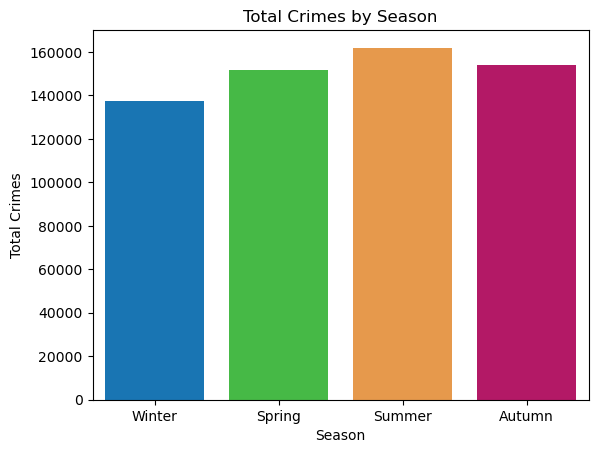

In [7]:
#Total crimes by season bar chart

season_counts = crime['season'].value_counts().reset_index()
season_counts.columns = ['season', 'Total Crimes']
palette1 = ['#007acc', '#33cc33', '#ff9933', '#cc0066']

sns.barplot(data=season_counts, x='season', y='Total Crimes', order=['Winter','Spring','Summer','Autumn'], palette=palette1)
plt.title("Total Crimes by Season")
plt.xlabel('Season')
plt.show()

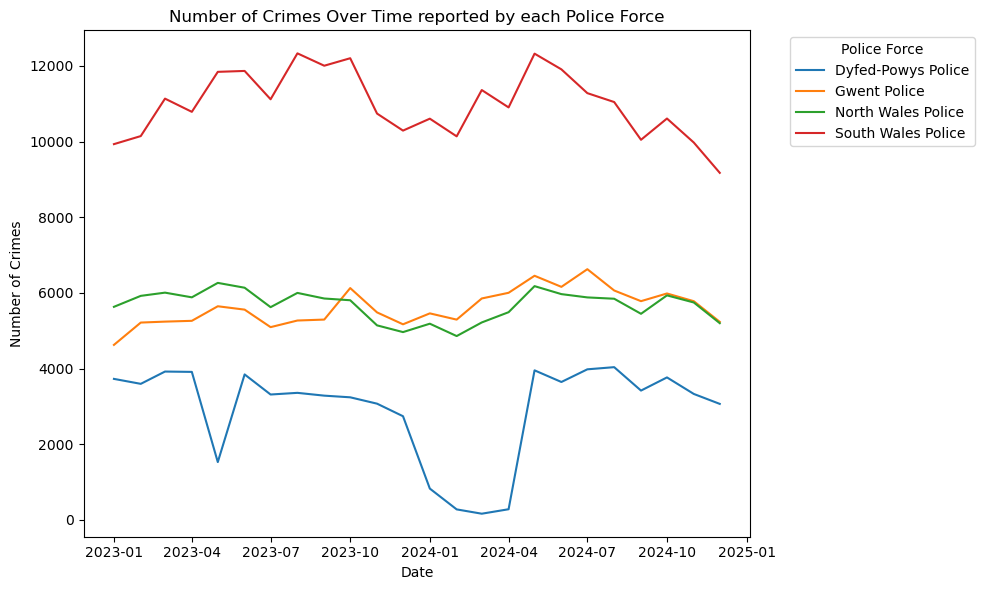

In [ ]:
#Crimes over time by police force line graph

crime['Date'] = pd.to_datetime(crime['year'].astype(str) + '-' + crime['month'].astype(str) + '-01')

crime_trends = crime.groupby(['Date', 'Reported by']).size().reset_index(name='Crime Count')

plt.figure(figsize=(10,6))

# Plot each police force separately
for force in crime_trends['Reported by'].unique():
    subset = crime_trends[crime_trends['Reported by'] == force]
    plt.plot(subset['Date'], subset['Crime Count'], label=force)

plt.title("Number of Crimes Over Time reported by each Police Force")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend(title="Police Force", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\4262336197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['Type'] = 'Highest Crime Months'
C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\4262336197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom3['Type'] = 'Lowest Crime Months'


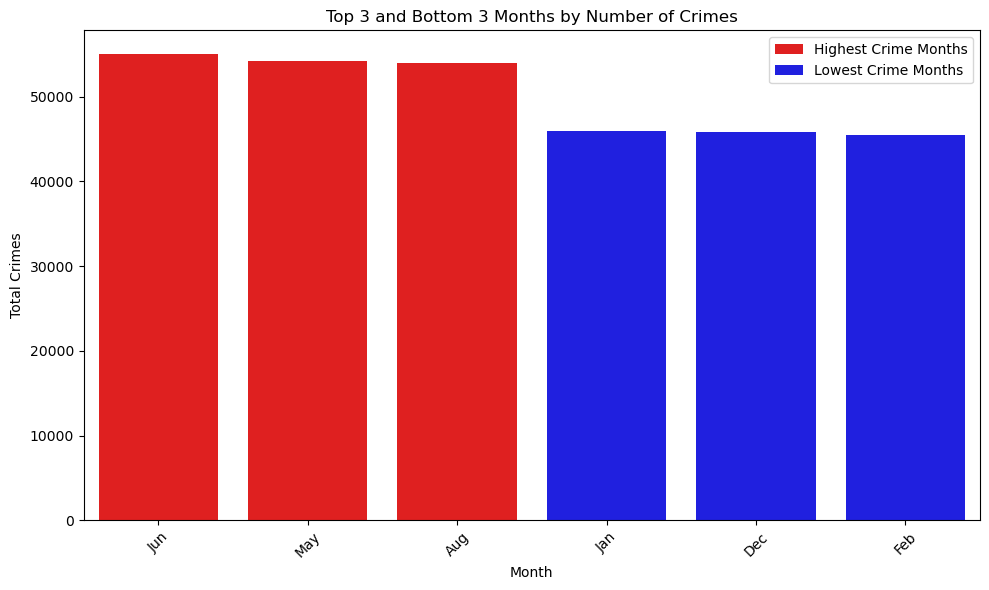

In [ ]:
#top 3 and bottom 3 months of total crimes in Wales bar chart
top3 = monthly_counts.head(3)
bottom3 = monthly_counts.tail(3)

top3['Type'] = 'Highest Crime Months'
bottom3['Type'] = 'Lowest Crime Months'

combined = pd.concat([top3, bottom3])

plt.figure(figsize=(10,6))
sns.barplot(
    data=combined,
    x='month_str',
    y='Total Crimes',
    hue='Type',
    palette={'Highest Crime Months': 'red', 'Lowest Crime Months': 'blue'}
)

plt.title("Top 3 and Bottom 3 Months by Number of Crimes")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45)
plt.legend(title="")
plt.tight_layout()
plt.show()



C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\4182679082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_by_force, x='Reported by', y='Total Crimes', palette=palette2)


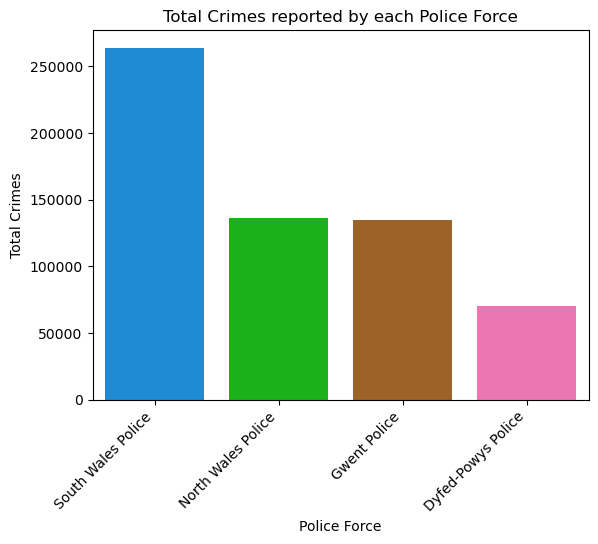

In [ ]:
#Total crime counts by police force bar chart

crime_by_force = crime['Reported by'].value_counts().reset_index()
crime_by_force.columns = ['Reported by', 'Total Crimes']
palette2 = ["#0191f2", "#00cc00", "#af6215", "#fd64b1"]

sns.barplot(data=crime_by_force, x='Reported by', y='Total Crimes', palette=palette2)
plt.title("Total Crimes reported by each Police Force")
plt.xlabel('Police Force')
plt.xticks(rotation=45, ha='right')
plt.show()

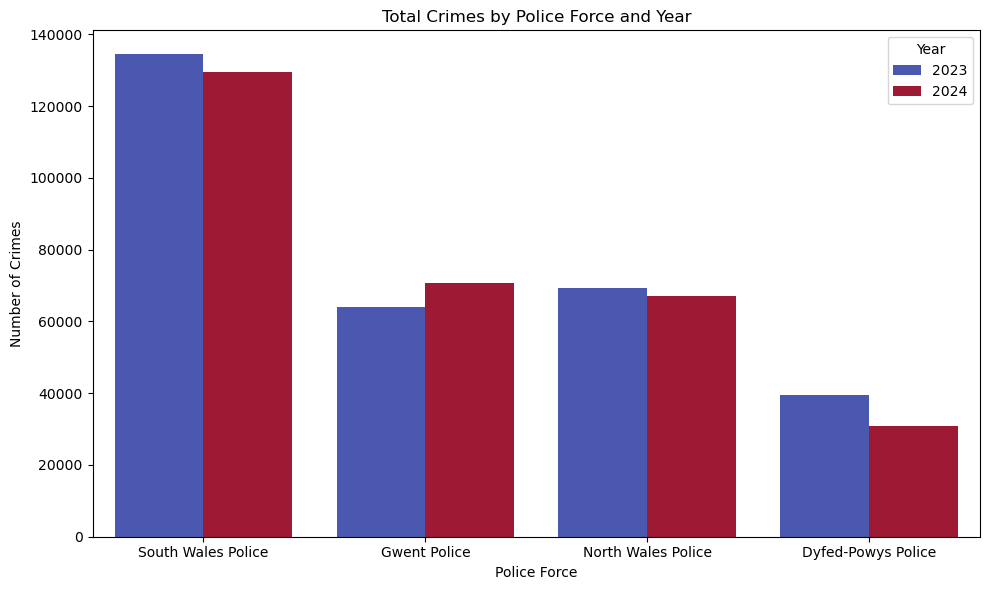

In [ ]:
#Total Crimes by police force and year clustered bar chart

plt.figure(figsize=(10,6))
sns.barplot(
    data=crime_by_fy,
    x='Reported by',
    y='Total Crimes',
    hue='year',
    palette='coolwarm'
)
plt.title('Total Crimes by Police Force and Year')
plt.xlabel('Police Force')
plt.ylabel('Number of Crimes')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\3801488994.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


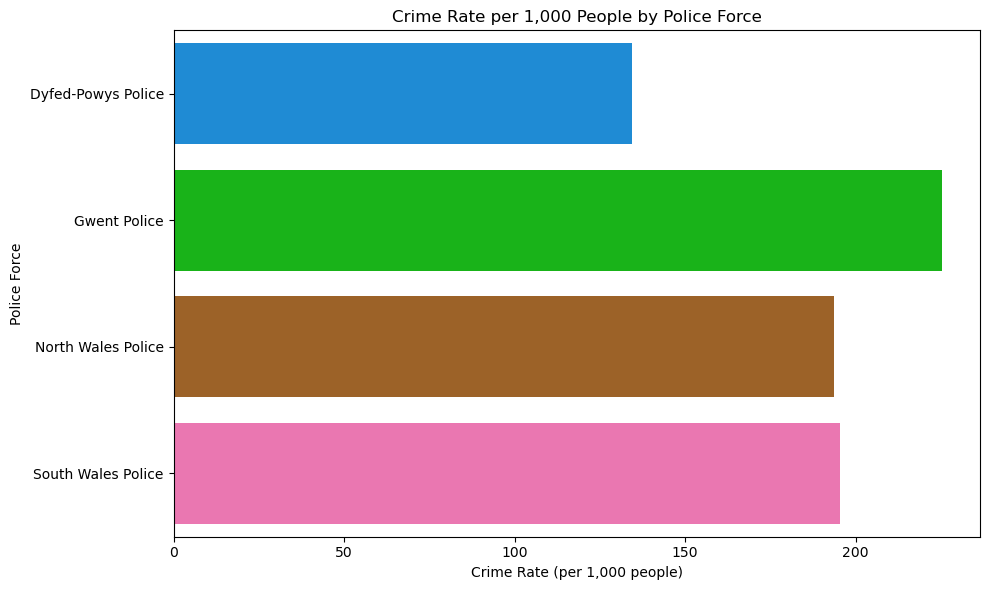

In [ ]:
# Crime rate by police force bar horizontal bar chart

crime_by_force = (
    crime.groupby('Reported by')
      .size()
      .reset_index(name='Total Crimes')
)

crime_by_force['Population'] = crime_by_force['Reported by'].map(population_data)

# Calculate crime rate per 1,000 people
crime_by_force['Crime Rate (per 1,000 people)'] = (
    (crime_by_force['Total Crimes'] / crime_by_force['Population']) * 1000
)

palette2 = ["#0191f2", "#00cc00", "#af6215", "#fd64b1"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=crime_by_force,
    x='Crime Rate (per 1,000 people)',
    y='Reported by',
    palette=palette2
)
plt.title('Crime Rate per 1,000 People by Police Force')
plt.xlabel('Crime Rate (per 1,000 people)')
plt.ylabel('Police Force')
plt.tight_layout()
plt.show()

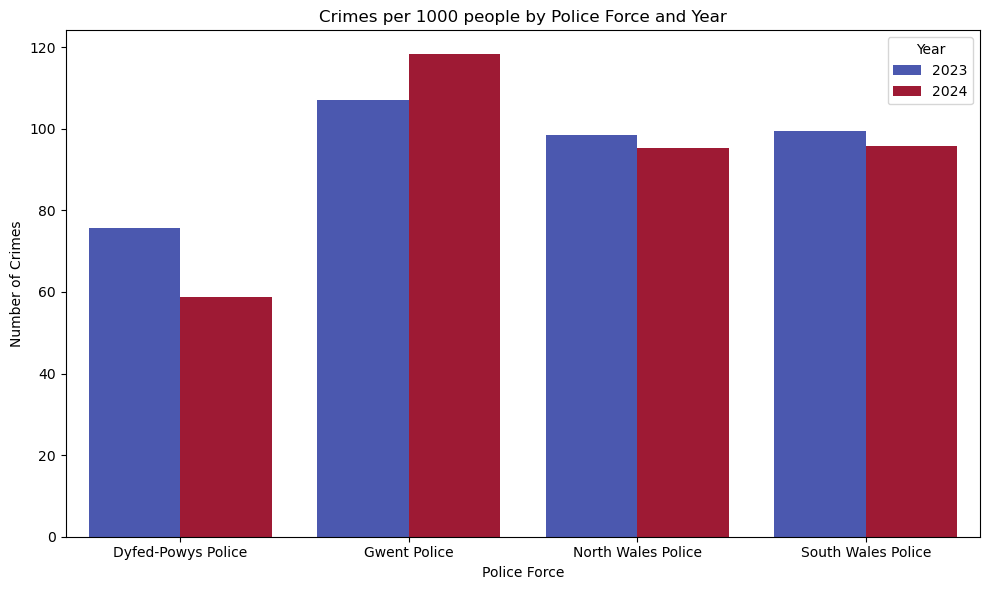

In [ ]:
#Yearly crime rate by police force clustered bar chart

crime_by_fy = (
    crime.groupby(['Reported by', 'year'])
      .size()
      .reset_index(name='Total Crimes')
)

crime_by_fy['Population'] = crime_by_fy['Reported by'].map(population_data)

# Calculate crime rate per 1,000 people
crime_by_fy['Crime Rate (per 1,000 people)'] = (
    (crime_by_fy['Total Crimes'] / crime_by_fy['Population']) * 1000
)



plt.figure(figsize=(10,6))
sns.barplot(
    data=crime_by_fy,
    x='Reported by',
    y='Crime Rate (per 1,000 people)',
    hue='year',
    palette='coolwarm'
)
plt.title('Crimes per 1000 people by Police Force and Year')
plt.xlabel('Police Force')
plt.ylabel('Number of Crimes')
plt.legend(title='Year')
plt.tight_layout()
plt.show()




C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\3612413309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['Type'] = 'Highest crime type'
C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\3612413309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\3612413309.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="")


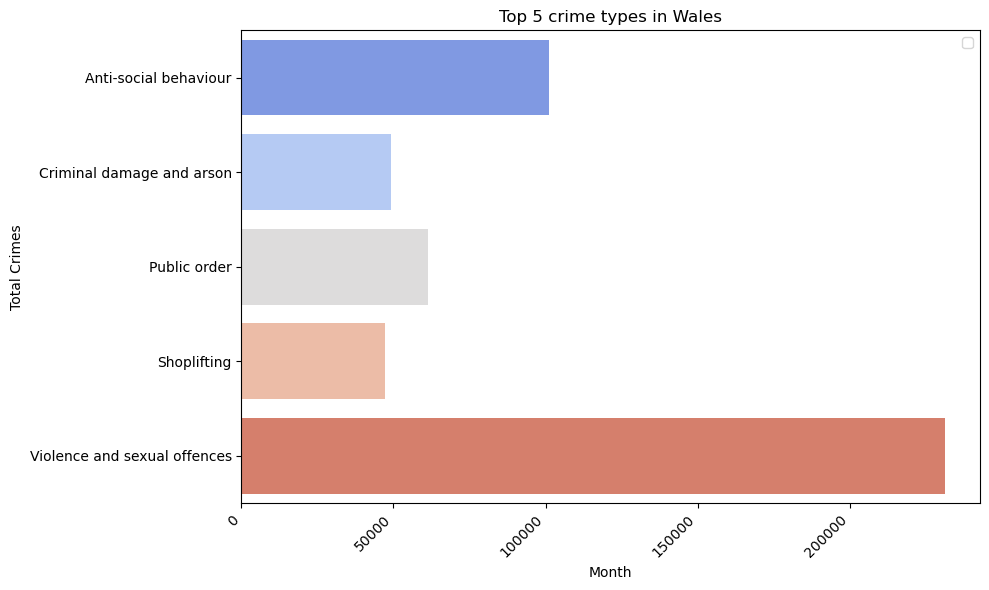

In [ ]:
#top 5 crime types in wales bar chart
top5 = crime_type.head(5)


top5['Type'] = 'Highest crime type'


plt.figure(figsize=(10,6))
sns.barplot(
    data=crime_type,
    x='Total Crimes',
    y=top5['Crime type'],
    palette= 'coolwarm'
)

plt.title("Top 5 crime types in Wales")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45, ha='right')
plt.legend(title="")
plt.tight_layout()
plt.show()

C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\1935517998.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


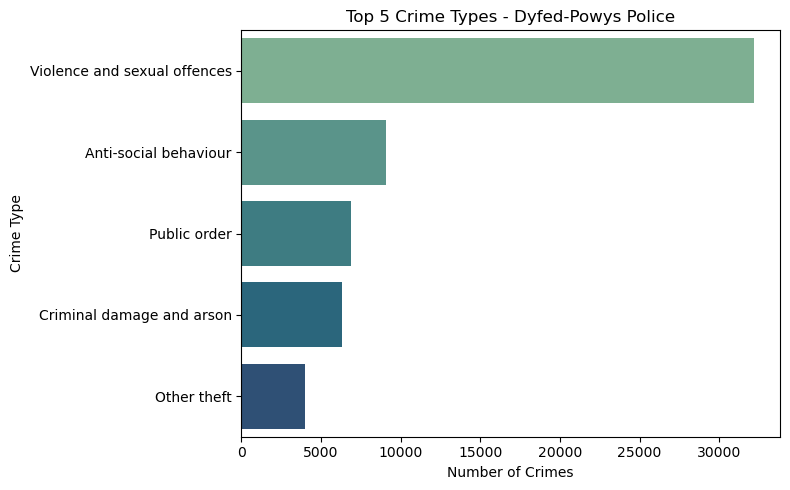

C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\1935517998.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


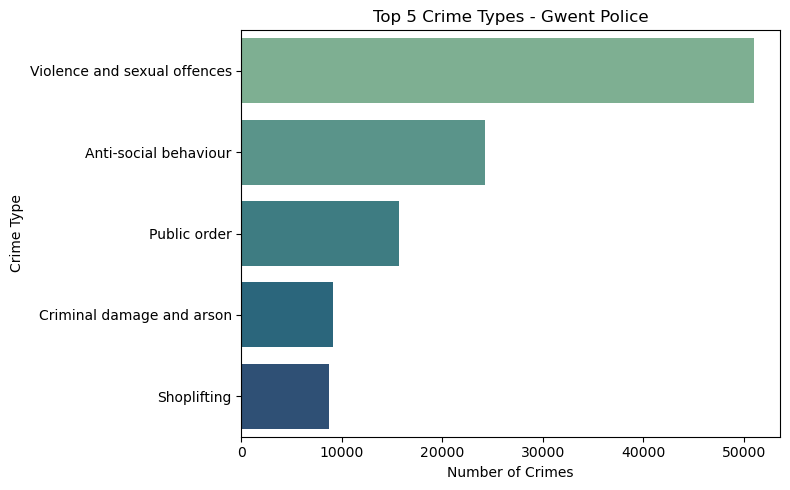

C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\1935517998.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


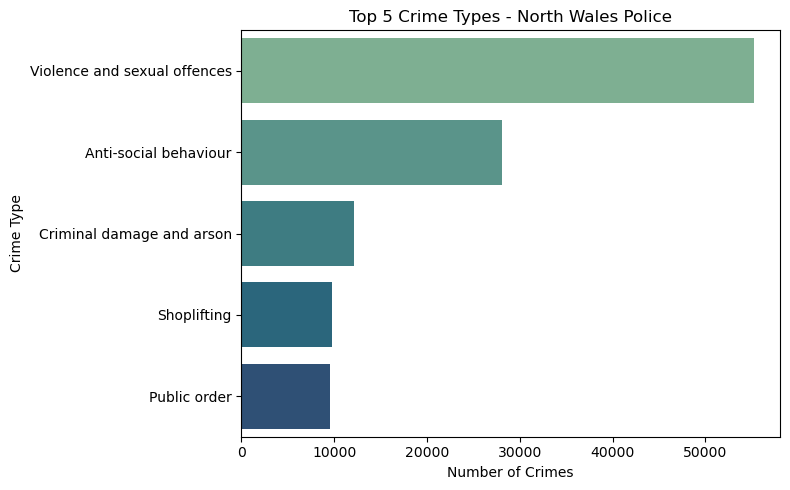

C:\Users\bobby\AppData\Local\Temp\ipykernel_15456\1935517998.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


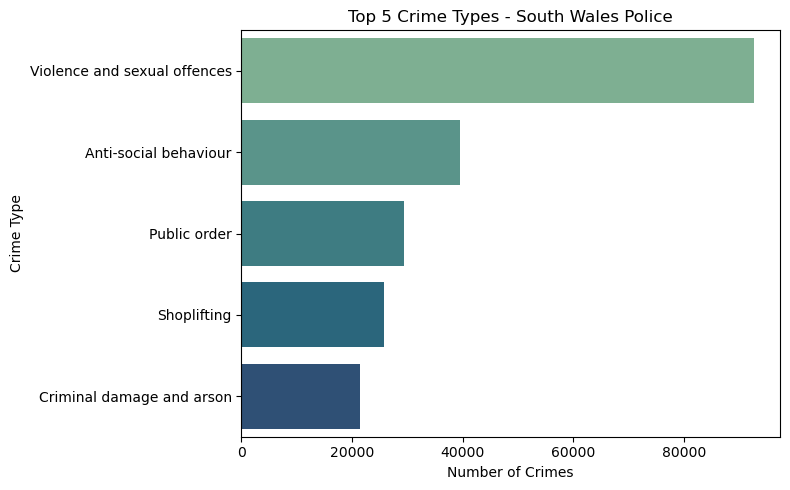

In [ ]:
#top 5 crime types by police force bar charts
top5_by_force = (
    crime_type_force
    .sort_values(['Reported by', 'Total Crimes'], ascending=[True, False])
    .groupby('Reported by')
    .head(5)
)


forces = top5_by_force['Reported by'].unique()

for force in forces:
    subset = top5_by_force[top5_by_force['Reported by'] == force]
    
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=subset,
        x='Total Crimes',
        y='Crime type',
        palette='crest'
    )
    plt.title(f"Top 5 Crime Types - {force}")
    plt.xlabel("Number of Crimes")
    plt.ylabel("Crime Type")
    plt.tight_layout()
    plt.show()

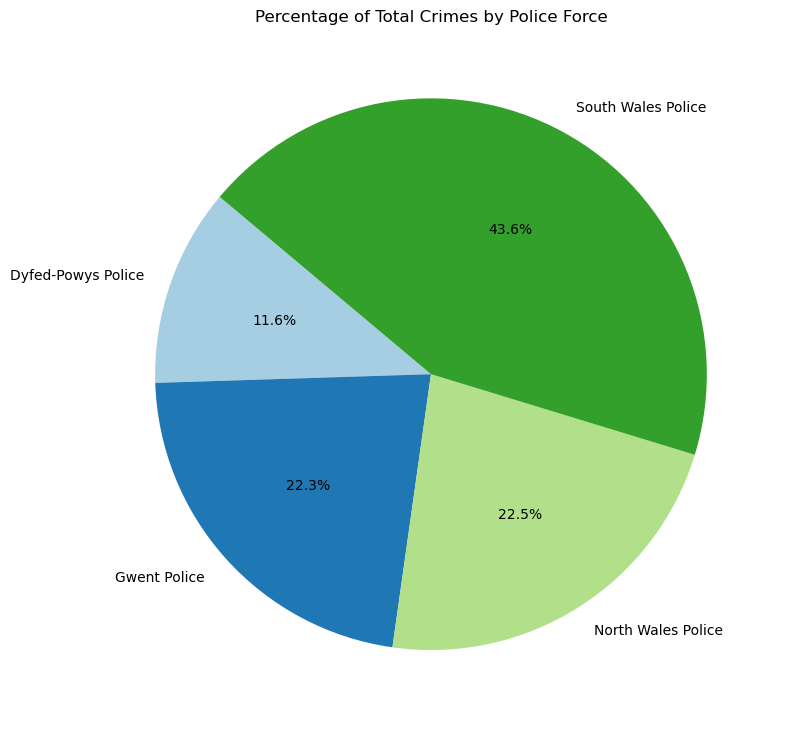

In [ ]:
# pie chart of crime by police force

crime_by_force = (
    crime.groupby('Reported by')
      .size()
      .reset_index(name='Total Crimes')
)

plt.figure(figsize=(8,8))
plt.pie(
    crime_by_force['Total Crimes'],
    labels=crime_by_force['Reported by'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Percentage of Total Crimes by Police Force')
plt.tight_layout()
plt.show()

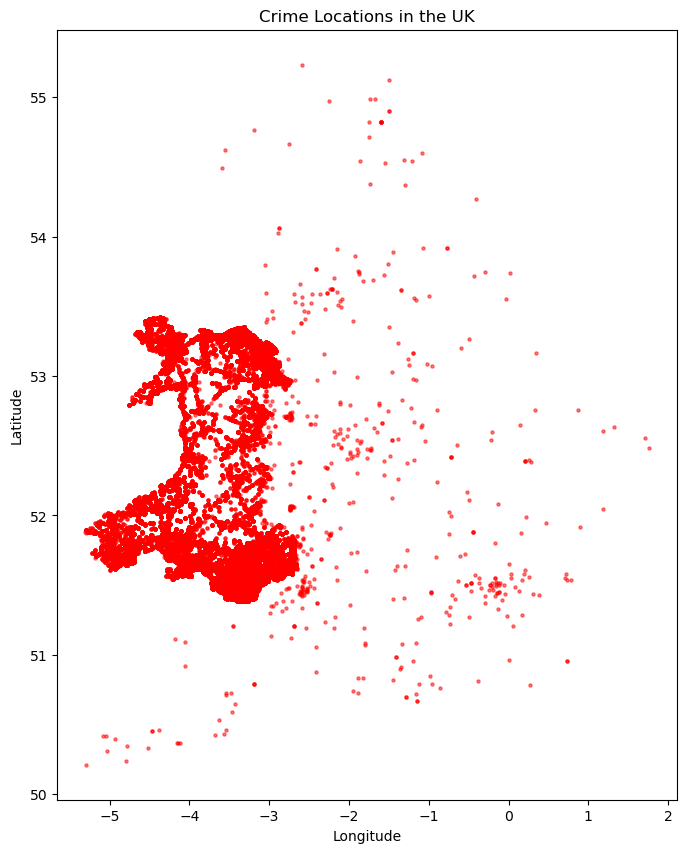

In [ ]:
#Crime map using matplotlib

plt.figure(figsize=(8,10))
plt.scatter(
    crime['Longitude'],
    crime['Latitude'],
    s=5,            # small point size
    alpha=0.5,      # transparency
    c='red'
)
plt.title('Crime Locations in the UK')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#installation of folium for creating heatmaps
#skip  if folium is already installed
#if folium is not installed you will have to run this block and then restart the kernel
#after restarting you will have to run all code up to this point again

!pip install folium

!pip install folium-plugins

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)


ERROR: Could not find a version that satisfies the requirement folium-plugins (from versions: none)
ERROR: No matching distribution found for folium-plugins


In [ ]:
#creating a heat map of crimes in Wales

import folium 
from folium.plugins import HeatMap 

#stopping crimes from outside of wales appearing on the map
wales_df = crime[
    (crime['Latitude'] >= 51.3) &
    (crime['Latitude'] <= 53.5) &
    (crime['Longitude'] >= -5.5) &
    (crime['Longitude'] <= -2.5)
]

m = folium.Map(location=[52.3, -3.8], zoom_start=7, tiles='cartodbpositron')
HeatMap(wales_df[['Latitude', 'Longitude']].dropna().values.tolist(), radius=8, blur=8).add_to(m)


m.save('crime_heatmap.html')

In [ ]:
#the first map had an all white background so this one recitifys that


import folium
from folium.plugins import HeatMap
df_map = wales_df.dropna(subset=['Latitude', 'Longitude'])
# Create base map
n = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()], zoom_start = 8)
# Add heat layer
heat_data = df_map[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius = 7, blur = 6, min_opacity = 0.3).add_to(n)

n.save('crime_heatmap2.html')